# Sentino API Client - Demo Notebook

This notebook shows the Sentino API Client for personality analysis.

## Features:
- Personality analysis from text
- DataFrame conversion
- Visualization
- Demo dataset analysis
- Multiple person comparison

In [1]:
import os
from sentino_api import SentinoClient
import matplotlib.pyplot as plt

# Initialize client
API_TOKEN = os.getenv("SENTINO_API_TOKEN")
client = SentinoClient(API_TOKEN)

## 1. Basic Text Analysis

Analyze personality traits from a text description

In [3]:
# Analyze a text sample
text = "I love meeting new people and going to parties. I'm very organized and always plan ahead."

# Results
result = client.score_text(text, inventories=["big5"])

# Convert to DataFrame
df = client.results_to_dataframe(result, inventory="big5")

print("Personality Analysis:")
print(df)

Personality Analysis:
               trait  score  quantile  confidence confidence_text
0      agreeableness  0.018     0.504       0.002        very low
1  conscientiousness  1.000     0.667       0.100             low
2       extraversion  1.000     0.690       0.123             low
3        neuroticism -0.503     0.400       0.050             low
4           openness  0.000     0.500       0.000        very low


## 2. Visualizing Personality Traits

Create visualization for personality profile

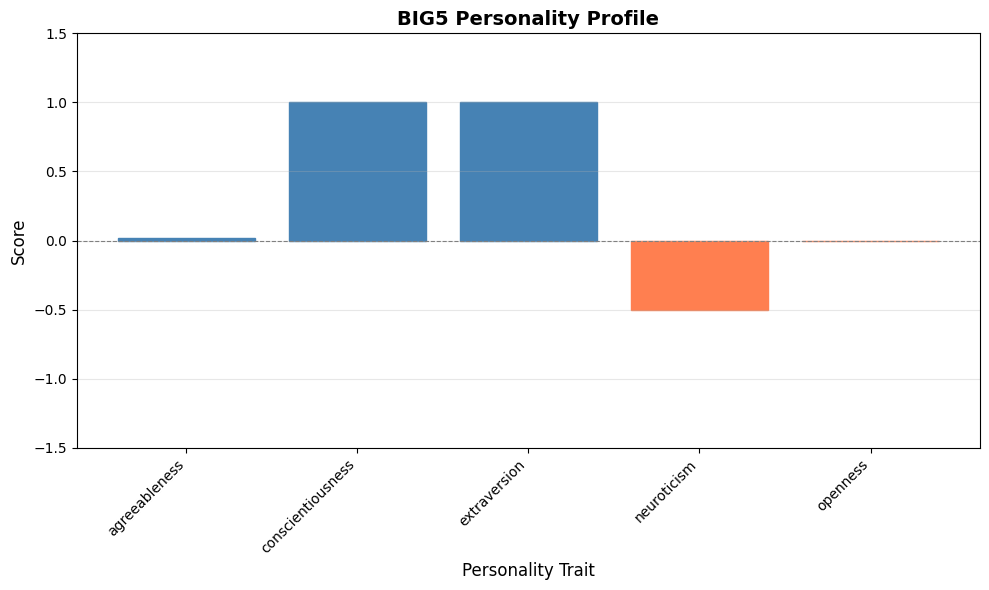

In [4]:
# Visualiation
fig = client.plot_traits(result, inventory="big5")
plt.show()

## 3. Analyzing Multiple Personalities

This package includes demo data with three different personality profiles

In [5]:
# Analyze 3 demo samples
results = client.analyze_demo(inventory="big5")

# Display profiles
for person in results:
    print(f"Name: {person['name']}")
    print(f"Text: {person['text']}")
    print(f"\nPersonality Analysis:")
    print(person['dataframe'])

Name: Alex
Text: I love meeting new friends and going to parties. I'm very organized and always plan ahead. I enjoy trying new things and exploring different ideas.

Personality Analysis:
               trait  score  quantile  confidence confidence_text
0      agreeableness   0.00     0.500       0.000        very low
1  conscientiousness   1.00     0.667       0.100             low
2       extraversion   1.00     0.759       0.215          normal
3        neuroticism  -0.36     0.424       0.036        very low
4           openness   1.00     0.667       0.100             low
Name: Bob
Text: I like spending time by myself. Sometimes, I worry about things that is not hapenning yet. I get stressed easily. I like routines and don't like unexpected changes.

Personality Analysis:
               trait  score  quantile  confidence confidence_text
0      agreeableness  0.000     0.500       0.000        very low
1  conscientiousness  0.000     0.500       0.000        very low
2       extrav

## 4. Comparison

Compare 3 personalities with table

In [7]:
# Comparison
comparison = client.compare_profiles(results, inventory="big5")

print("Comparison Table:")
print(comparison)

# Highest personalities traits
print("\n Highest Personalities Traits:")
for col in comparison.columns:
    if col != "name":
        max_idx = comparison[col].idxmax()
        max_person = comparison.loc[max_idx, "name"]
        max_score = comparison.loc[max_idx, col]
        print(f"  {col.capitalize()}: {max_person} ({max_score:.2f})")

Comparison Table:
    name  agreeableness  conscientiousness  extraversion  neuroticism  \
0   Alex            0.0                1.0         1.000       -0.360   
1    Bob            0.0                0.0        -0.788        1.000   
2  Cindy            1.0                0.0         0.811       -0.624   

   openness  
0     1.000  
1    -0.352  
2     1.000  

 Highest Personalities Traits:
  Agreeableness: Cindy (1.00)
  Conscientiousness: Alex (1.00)
  Extraversion: Alex (1.00)
  Neuroticism: Bob (1.00)
  Openness: Alex (1.00)


## 5. Visualization Comparison

Plot three personalities to see the differences

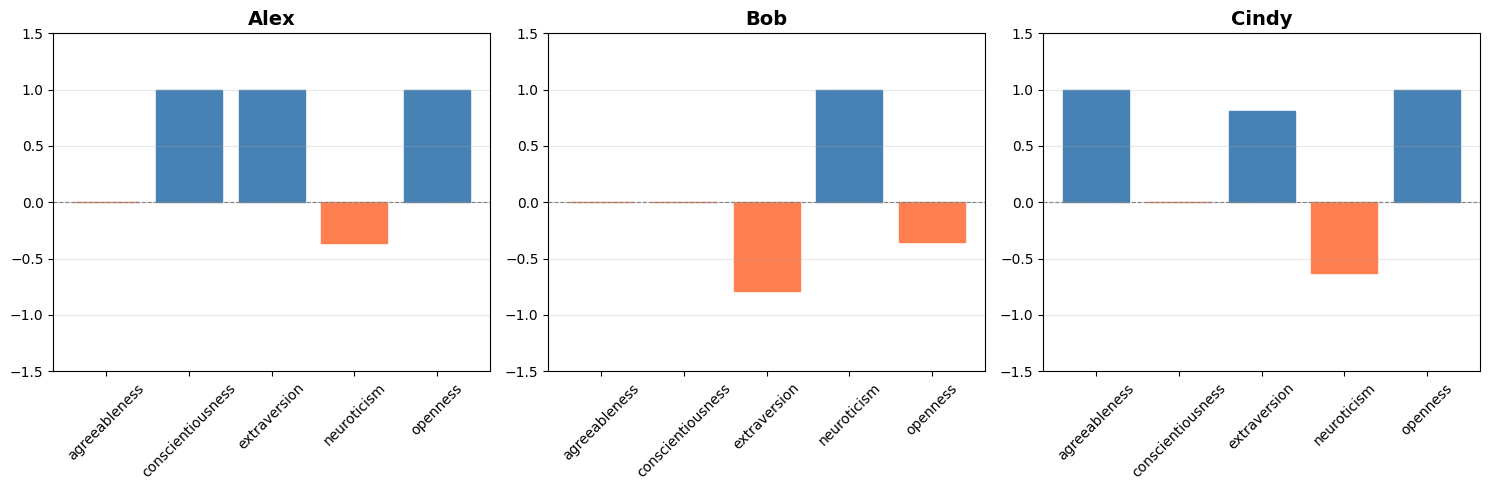

In [9]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, person in enumerate(results):
    df = person['dataframe']
    
    # Bars
    bars = axes[i].bar(df['trait'], df['score'])
    
    # Colors (blue = positive, coral = negative)
    for j, score in enumerate(df['score']):
        bars[j].set_color('steelblue' if score > 0 else 'coral')
    
    # Format
    axes[i].set_title(person['name'], fontweight='bold', fontsize=14)
    axes[i].set_ylim(-1.5, 1.5)
    axes[i].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

This notebook shows the key features of the Sentino API Client:

**Text Analysis** - Convert natural language text into personality scores  

**DataFrame Conversion** - Convert JSON to DataFrame, clean format for analysis  

**Visualization** - Visualization for personality scores  

**Demo Dataset** - Built-in sample data for testing  

**Comparison Tools** - Analyze multiple profiles' personalities

## Next Steps

- Try analyzing your own text samples
- Use the comparison tools for research

For more information, see the [README](README.md) or visit [Sentino API Documentation](https://sentino.org/api/)